In [5]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')

In [2]:
df.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
440508,Data Analyst,Middle/Senior Data Analyst,Ukraine,via LinkedIn,Full-time,False,Ukraine,2023-03-02 16:32:26,False,False,Ukraine,NaN,NaN,NaN,SKELAR,"['sql', 'python', 'mysql', 'bigquery', 'airflo...","{'analyst_tools': ['tableau'], 'cloud': ['bigq..."
696498,Senior Data Analyst,Senior Data Analyst,"Reston, VA",via LinkedIn,Contractor,False,"New York, United States",2023-01-14 03:02:51,False,False,United States,NaN,NaN,NaN,Dice,['sql'],{'programming': ['sql']}
155276,Data Scientist,Data Scientist,Belgium,via LinkedIn Belgium,Full-time,False,Belgium,2023-02-14 08:34:38,False,False,Belgium,NaN,NaN,NaN,WDP - Warehouses with brains,['power bi'],{'analyst_tools': ['power bi']}
346158,Data Analyst,BI Data Analyst (m/w/d),"Kleinostheim, Germany",via WJTV Jobs,Full-time,False,Germany,2023-08-08 00:19:13,True,False,Germany,NaN,NaN,NaN,UNION TANK Eckstein GmbH & Co. KG,"['sql', 'azure', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'cl..."


In [3]:
df['job_skills'][2]

"['python', 'sql', 'c#', 'azure', 'airflow', 'dax', 'docker', 'kubernetes', 'jenkins']"

In [6]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_month_num'] = df['job_posted_date'].dt.month
df['job_posted_month'] = pd.to_datetime(df['job_month_num'], format='%m').dt.strftime('%b')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
713614,Data Scientist,científico de datos,"Medellín, Medellin, Antioquia, Colombia",via BeBee,Full-time,False,Colombia,2023-09-30 02:25:14,False,False,Colombia,NaN,NaN,NaN,Marlex,NaN,NaN,9,Sep
331654,Senior Data Scientist,Senior Big Data Platform Lead,Hong Kong,via BeBee 香港,Full-time,False,Hong Kong,2023-01-15 23:30:29,True,False,Hong Kong,NaN,NaN,NaN,AXA,"[sql, sql server, azure]","{'cloud': ['azure'], 'databases': ['sql server...",1,Jan
179233,Data Analyst,Head of Data Analytics,"Leuven, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-02-08 23:41:48,True,False,Belgium,NaN,NaN,NaN,NonStop Consulting,NaN,NaN,2,Feb
438884,Data Scientist,Information Analyst,"Amsterdam, Netherlands",via LinkedIn,Full-time,False,Netherlands,2023-09-07 16:30:14,True,False,Netherlands,NaN,NaN,NaN,Tata Consultancy Services,NaN,NaN,9,Sep


In [6]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [17]:
df['job_country'].value_counts().head(10)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Name: count, dtype: int64

In [18]:
df_da_ind = df[(df['job_country'] == 'India') & (df['job_title_short'] =='Data Analyst')].copy()
df_da_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6121 entries, 38 to 785715
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        6121 non-null   object        
 1   job_title              6121 non-null   object        
 2   job_location           6121 non-null   object        
 3   job_via                6121 non-null   object        
 4   job_schedule_type      6102 non-null   object        
 5   job_work_from_home     6121 non-null   bool          
 6   search_location        6121 non-null   object        
 7   job_posted_date        6121 non-null   datetime64[ns]
 8   job_no_degree_mention  6121 non-null   bool          
 9   job_health_insurance   6121 non-null   bool          
 10  job_country            6121 non-null   object        
 11  salary_rate            97 non-null     object        
 12  salary_year_avg        94 non-null     float64       
 13  salar

In [4]:
import os
os.makedirs('Charts', exist_ok = True)

In [20]:
df_da_ind = df_da_ind[df_da_ind['job_location'] != 'Anywhere']

In [21]:
df_da_ind['job_location'].value_counts()

job_location
India                          2056
Hyderabad, Telangana, India    1289
Bengaluru, Karnataka, India     355
Maharashtra, India              203
Mumbai, Maharashtra, India      133
                               ... 
Singapur, Telangana, India        1
Nilanga, Maharashtra, India       1
Kochi, Kerala, India              1
Mormugao, Goa, India              1
Salem, Tamil Nadu, India          1
Name: count, Length: 142, dtype: int64

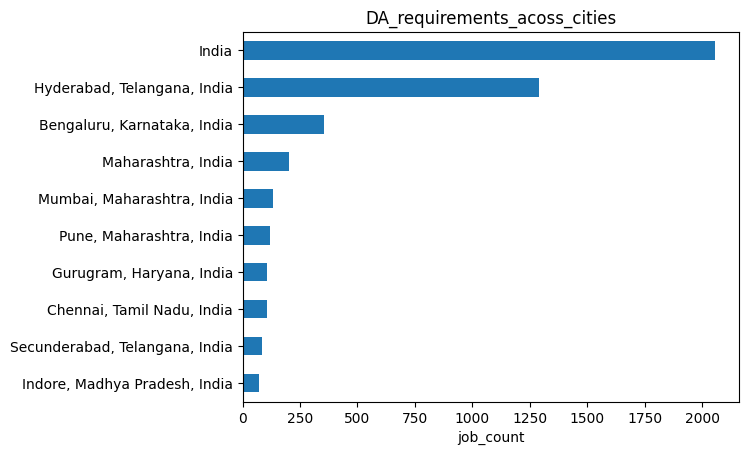

In [22]:
top_job_city = df_da_ind['job_location'].value_counts().to_frame().head(10)
top_job_city.reset_index(inplace=True)
top_job_city.plot(kind='barh', x= 'job_location', y = 'count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('job_count')
plt.legend().set_visible(False)
plt.title('DA_requirements_acoss_cities')
plt.savefig('Charts/high_job_offering_indian_cities.png',dpi = 300,bbox_inches='tight' )
plt.show()



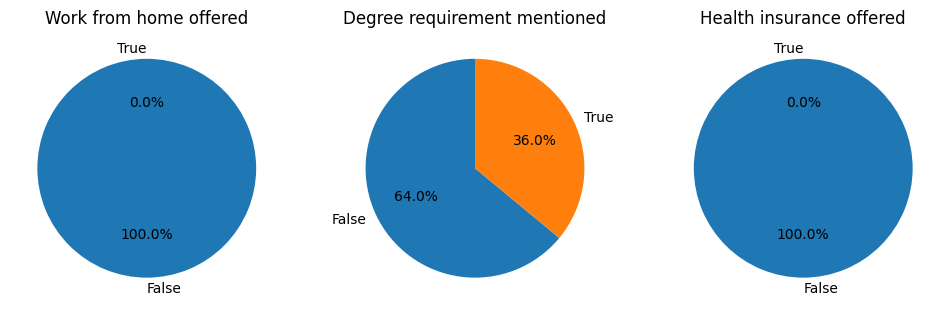

In [23]:
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention': 'Degree requirement mentioned',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_da_ind[column].value_counts().reindex([False, True], fill_value=0)
    
    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)
fig.savefig('Charts/degree_vs_WFH.png',dpi = 300,bbox_inches='tight' )
plt.show()


In [24]:
df_da_ind.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
493303,Data Analyst,Data Quality - Assistant Manager,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-02-15 11:29:58,False,False,India,NaN,NaN,NaN,Deloitte,"[sql, excel, powerpoint, word, power bi]","{'analyst_tools': ['excel', 'powerpoint', 'wor...",2,Feb
673873,Data Analyst,DATA Analyst,India,via Indeed,Full-time,False,India,2023-01-02 10:25:16,True,False,India,NaN,NaN,NaN,Udaan Consultants,[excel],{'analyst_tools': ['excel']},1,Jan
744558,Data Analyst,Employee Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-12-05 20:10:34,True,False,India,NaN,NaN,NaN,"Salesforce, Inc.",[excel],{'analyst_tools': ['excel']},12,Dec
318935,Data Analyst,Google Analytics Consultant,India,via BeBee India,Full-time,False,India,2023-06-25 17:48:25,False,False,India,NaN,NaN,NaN,Dentsu Inc,"[html, javascript, bigquery, tableau, looker, ...","{'analyst_tools': ['tableau', 'looker'], 'asyn...",6,Jun
261997,Data Analyst,Data Management Analyst,"Secunderabad, Telangana, India",via Trabajo.org,Full-time,False,India,2023-08-23 07:11:20,True,False,India,NaN,NaN,NaN,JP Morgan Chase & Co.,[excel],{'analyst_tools': ['excel']},8,Aug


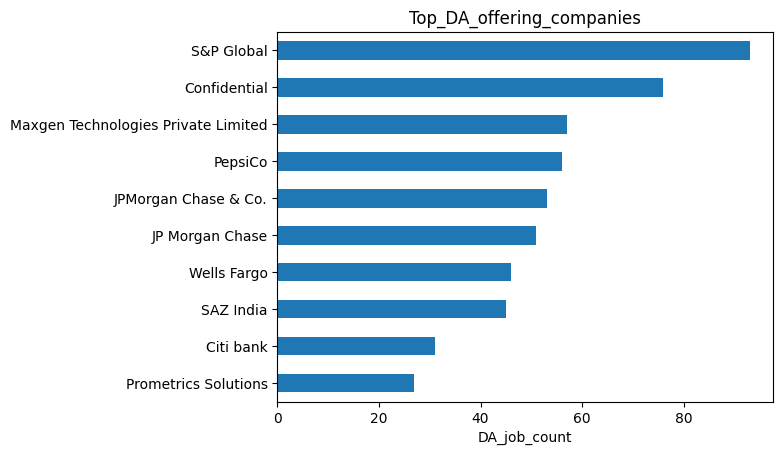

In [25]:
top_available_company = df_da_ind['company_name'].value_counts().head(10).to_frame()
top_available_company.reset_index(inplace=True)
top_available_company.plot(kind='barh',x= 'company_name', y= 'count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('DA_job_count')
plt.legend().set_visible(False)
plt.title('Top_DA_offering_companies')
plt.savefig('Charts/top_DA_offering_comanies.png',dpi = 300,bbox_inches='tight' )
plt.show()


In [26]:
df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
136012,Data Analyst,Medior Data Analyst,"Belgrade, Serbia",via SmartRecruiters Job Search,Full-time,False,Serbia,2023-11-08 08:46:38,False,False,Serbia,NaN,NaN,NaN,Bosch Group,"[sql, python, c#, power bi, ssis]","{'analyst_tools': ['power bi', 'ssis'], 'progr...",11,Nov
230661,Business Analyst,Assistant Business Analyst,India,via BeBee India,Full-time,False,India,2023-04-23 07:10:36,False,False,India,NaN,NaN,NaN,Ascendeum,NaN,NaN,4,Apr
662159,Data Analyst,Marketing Data Analyst,"Naples, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-16 10:18:57,False,False,United States,NaN,NaN,NaN,Arthrex,"[sql, azure, power bi, tableau, cognos]","{'analyst_tools': ['power bi', 'tableau', 'cog...",1,Jan
53011,Senior Data Scientist,Data Platform Lead,Australia,via LinkedIn,Full-time,False,Australia,2023-07-11 06:23:49,True,False,Australia,NaN,NaN,NaN,Peoplebank,"[sql, sql server, snowflake]","{'cloud': ['snowflake'], 'databases': ['sql se...",7,Jul
207142,Data Scientist,"Data Scientist, SME","Fort Bragg, NC",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-24 22:06:50,False,False,United States,NaN,NaN,NaN,CACI International,NaN,NaN,1,Jan


In [5]:
df_ind = df[df['job_country']=='India'].copy()


In [28]:
df_ind_exp = df_ind.explode('job_skills').astype(str)
# df_ind_exp.sample()
# df_ind_exp[['job_title_short', 'job_skills']]
df_ind_exp=df_ind_exp.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_ind_exp.sort_values(by='skill_count', ascending=False, inplace=True)
job_title = df_ind_exp['job_title_short'].value_counts().head(4)
job_title = list(job_title.index)
job_title = sorted(job_title)
df_ind_exp


,job_title_short,job_skills,skill_count
641,Data Engineer,sql,12993
607,Data Engineer,python,11568
812,Data Scientist,python,9248
636,Data Engineer,spark,7157
483,Data Engineer,aws,6993
...,...,...,...
1639,Software Engineer,rshiny,1
1669,Software Engineer,symfony,1
7,Business Analyst,asp.net,1
5,Business Analyst,arch,1


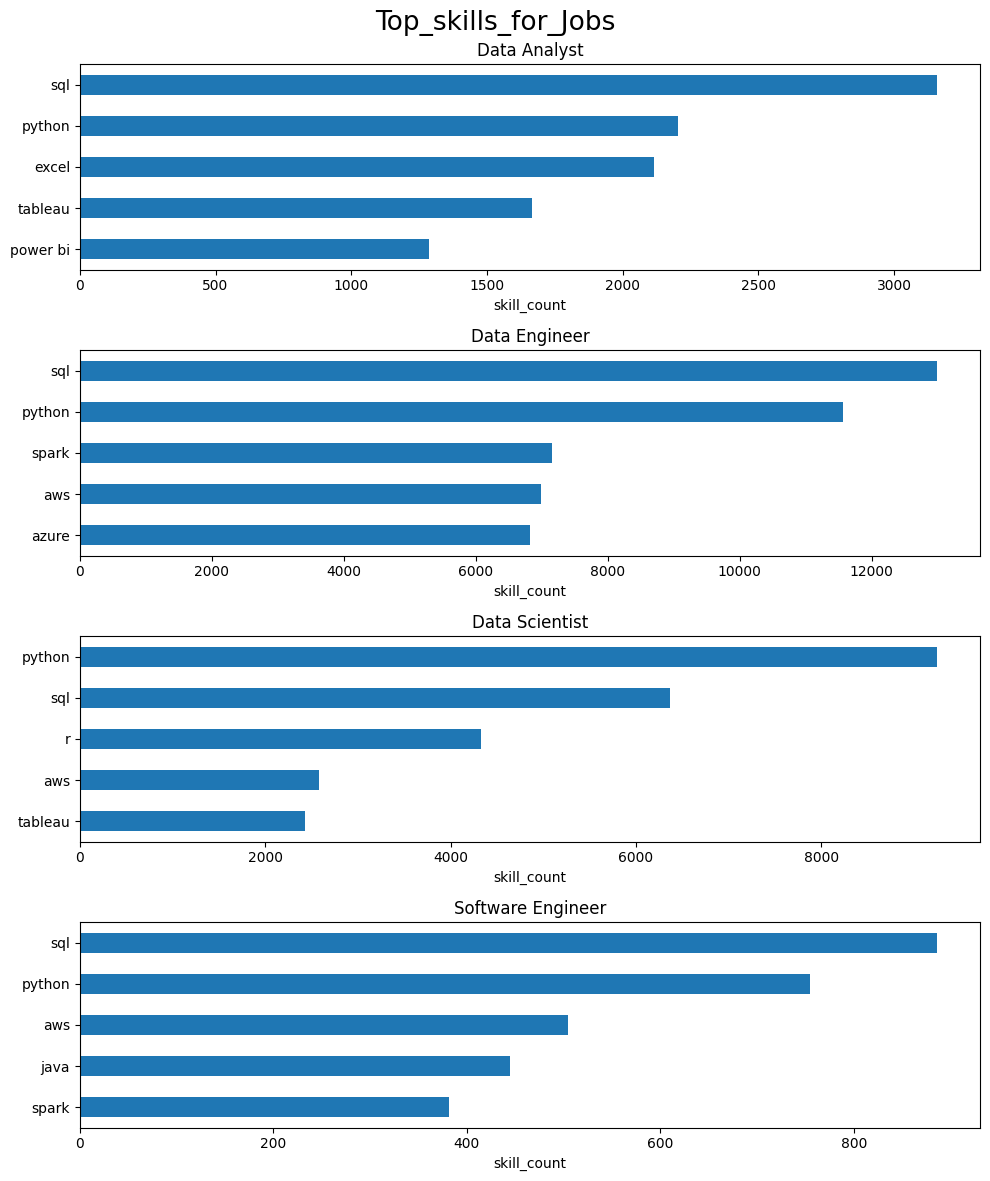

In [29]:
fig,ax = plt.subplots(len(job_title),1, figsize=(10,12 ))

for i, job in enumerate(job_title):
    skill_plot = df_ind_exp[df_ind_exp['job_title_short']== job].head()
    skill_plot.plot(kind='barh', x ='job_skills', y = 'skill_count',ax= ax[i], title=job)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('skill_count')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
plt.suptitle('Top_skills_for_Jobs', fontsize= 19)
plt.tight_layout()
fig.savefig('Charts/top_skills_for_DA_DE_DS.png',dpi = 300,bbox_inches='tight' )
plt.show()
    

In [30]:
df_ind_skills = df_ind.explode('job_skills').astype(str)
df_ind_skills = df_ind_skills['job_title_short'].value_counts().reset_index(name='total_skill_count')
df_ind_skills

,job_title_short,total_skill_count
0,Data Engineer,128144
1,Data Scientist,70549
2,Senior Data Engineer,33249
3,Data Analyst,23525
4,Senior Data Scientist,13920
5,Software Engineer,10751
6,Business Analyst,6292
7,Senior Data Analyst,4916
8,Machine Learning Engineer,4484
9,Cloud Engineer,1877


In [31]:
df_ind_exp

,job_title_short,job_skills,skill_count
641,Data Engineer,sql,12993
607,Data Engineer,python,11568
812,Data Scientist,python,9248
636,Data Engineer,spark,7157
483,Data Engineer,aws,6993
...,...,...,...
1639,Software Engineer,rshiny,1
1669,Software Engineer,symfony,1
7,Business Analyst,asp.net,1
5,Business Analyst,arch,1


In [32]:
ind_de = df_ind_exp[df_ind_exp['job_title_short'] == 'Data Engineer'].copy()
ind_de.loc['total_skills'] = ind_de['skill_count'].sum()
ind_de

,job_title_short,job_skills,skill_count
641,Data Engineer,sql,12993
607,Data Engineer,python,11568
636,Data Engineer,spark,7157
483,Data Engineer,aws,6993
484,Data Engineer,azure,6819
...,...,...,...
644,Data Engineer,sqlserver,1
649,Data Engineer,symfony,1
624,Data Engineer,sass,1
635,Data Engineer,solidity,1


In [33]:
skill_percent = df_ind_exp.merge(df_ind_skills, how='left', on='job_title_short')
skill_percent['percent_holds'] = 100 * skill_percent['skill_count']/skill_percent['total_skill_count']
skill_percent

,job_title_short,job_skills,skill_count,total_skill_count,percent_holds
0,Data Engineer,sql,12993,128144,10.139374
1,Data Engineer,python,11568,128144,9.027344
2,Data Scientist,python,9248,70549,13.108620
3,Data Engineer,spark,7157,128144,5.585123
4,Data Engineer,aws,6993,128144,5.457142
...,...,...,...,...,...
1694,Software Engineer,rshiny,1,10751,0.009301
1695,Software Engineer,symfony,1,10751,0.009301
1696,Business Analyst,asp.net,1,6292,0.015893
1697,Business Analyst,arch,1,6292,0.015893


In [34]:
skill_percent[skill_percent['job_title_short']=='Data Analyst']

,job_title_short,job_skills,skill_count,total_skill_count,percent_holds
15,Data Analyst,sql,3159,23525,13.428268
26,Data Analyst,python,2203,23525,9.364506
27,Data Analyst,excel,2117,23525,8.998937
40,Data Analyst,tableau,1667,23525,7.086079
53,Data Analyst,power bi,1286,23525,5.466525
...,...,...,...,...,...
1662,Data Analyst,hugging face,1,23525,0.004251
1674,Data Analyst,fastapi,1,23525,0.004251
1679,Data Analyst,suse,1,23525,0.004251
1689,Data Analyst,centos,1,23525,0.004251


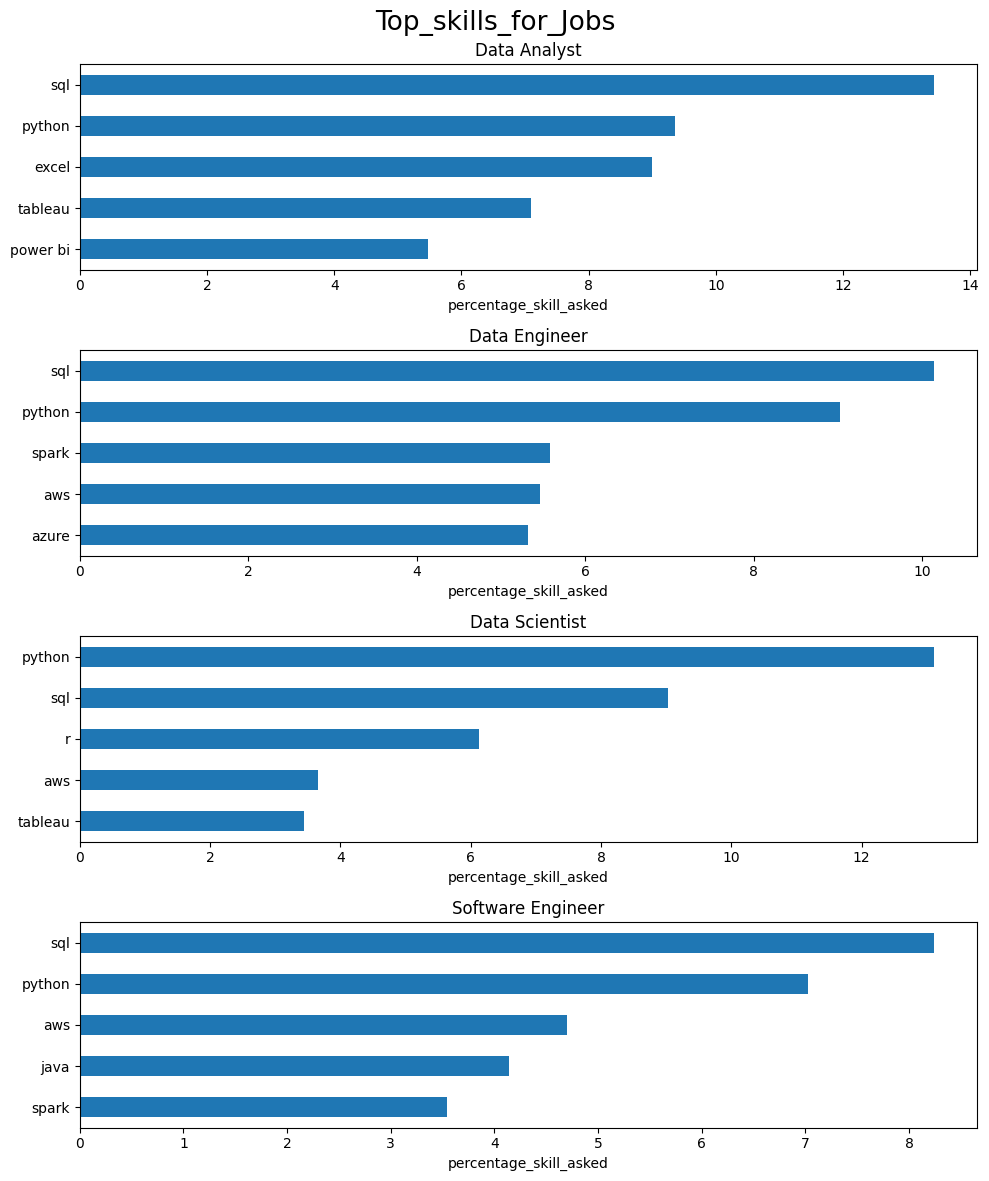

In [35]:
fig,ax = plt.subplots(len(job_title),1, figsize=(10,12 ))

for i, job in enumerate(job_title):
    skill_plot = skill_percent[skill_percent['job_title_short']== job].head()
    skill_plot.plot(kind='barh', x ='job_skills', y = 'percent_holds',ax= ax[i], title=job)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('percentage_skill_asked')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
plt.suptitle('Top_skills_for_Jobs', fontsize= 19)
plt.tight_layout()
plt.show()

In [36]:
df_da_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5069 entries, 38 to 785715
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        5069 non-null   object        
 1   job_title              5069 non-null   object        
 2   job_location           5069 non-null   object        
 3   job_via                5069 non-null   object        
 4   job_schedule_type      5055 non-null   object        
 5   job_work_from_home     5069 non-null   bool          
 6   search_location        5069 non-null   object        
 7   job_posted_date        5069 non-null   datetime64[ns]
 8   job_no_degree_mention  5069 non-null   bool          
 9   job_health_insurance   5069 non-null   bool          
 10  job_country            5069 non-null   object        
 11  salary_rate            93 non-null     object        
 12  salary_year_avg        93 non-null     float64       
 13  salar

In [37]:
df_da_ind_exp = df_da_ind.explode('job_skills').copy()
df_da_ind_exp.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
514286,Data Analyst,Actuarial Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-07-29 11:10:14,False,False,India,NaN,NaN,NaN,Milliman,javascript,"{'cloud': ['databricks'], 'libraries': ['spark...",7,Jul
247012,Data Analyst,Data Integration and Business Intelligence Ana...,India,via Ai-Jobs.net,Full-time,False,India,2023-07-27 07:12:37,False,False,India,year,79200.0,NaN,Miratech,windows,"{'analyst_tools': ['tableau'], 'os': ['unix', ...",7,Jul
503004,Data Analyst,Data Science Analyst,"Narsingi, Telangana, India",via The Muse,Full-time,False,India,2023-09-01 11:30:59,False,False,India,NaN,NaN,NaN,PepsiCo,sql,"{'cloud': ['azure', 'databricks'], 'libraries'...",9,Sep


In [38]:
ind_da_piv = df_da_ind_exp.pivot_table(index=['job_month_num'], columns='job_skills',fill_value=0,aggfunc='size')
ind_da_piv.loc['total']=ind_da_piv.sum()
sorted_cols = ind_da_piv.loc['total'].sort_values(ascending=False).index
ind_da_piv = ind_da_piv.reindex(columns=sorted_cols)
ind_da_piv = ind_da_piv.iloc[:, :5]
ind_da_piv = ind_da_piv.drop('total')
ind_da_piv


job_skills,sql,python,excel,tableau,power bi
job_month_num,,,,,
1,240,179,178,125,83
2,172,128,131,96,62
3,192,129,120,101,63
4,165,117,116,80,70
5,122,75,84,56,42
6,154,121,93,90,56
7,207,135,141,103,82
8,287,197,171,136,114
9,284,194,190,161,142


In [39]:
total_skill_per_month = df_da_ind_exp.groupby(by='job_month_num')['job_skills'].count()
# total_skill_per_month=total_skill_per_month.reset_index(name='skill_total')
total_skill_per_month

job_month_num
1     1812
2     1337
3     1420
4     1296
5      801
6     1160
7     1465
8     2111
9     1875
10    1339
11    2064
12    1840
Name: job_skills, dtype: int64

In [40]:
percent_skills = ind_da_piv.div(total_skill_per_month/100,axis = 0)
percent_skills = percent_skills.reset_index()
percent_skills['job_month'] = pd.to_datetime(percent_skills['job_month_num'],format='%m').dt.strftime('%b')
percent_skills.drop('job_month_num', axis = 1, inplace = True)
percent_skills.set_index(keys='job_month', inplace =True)
percent_skills

job_skills,sql,python,excel,tableau,power bi
job_month,,,,,
Jan,13.245033,9.878587,9.823400,6.898455,4.580574
Feb,12.864622,9.573672,9.798055,7.180254,4.637248
Mar,13.521127,9.084507,8.450704,7.112676,4.436620
Apr,12.731481,9.027778,8.950617,6.172840,5.401235
May,15.230961,9.363296,10.486891,6.991261,5.243446
Jun,13.275862,10.431034,8.017241,7.758621,4.827586
Jul,14.129693,9.215017,9.624573,7.030717,5.597270
Aug,13.595452,9.332070,8.100426,6.442444,5.400284
Sep,15.146667,10.346667,10.133333,8.586667,7.573333


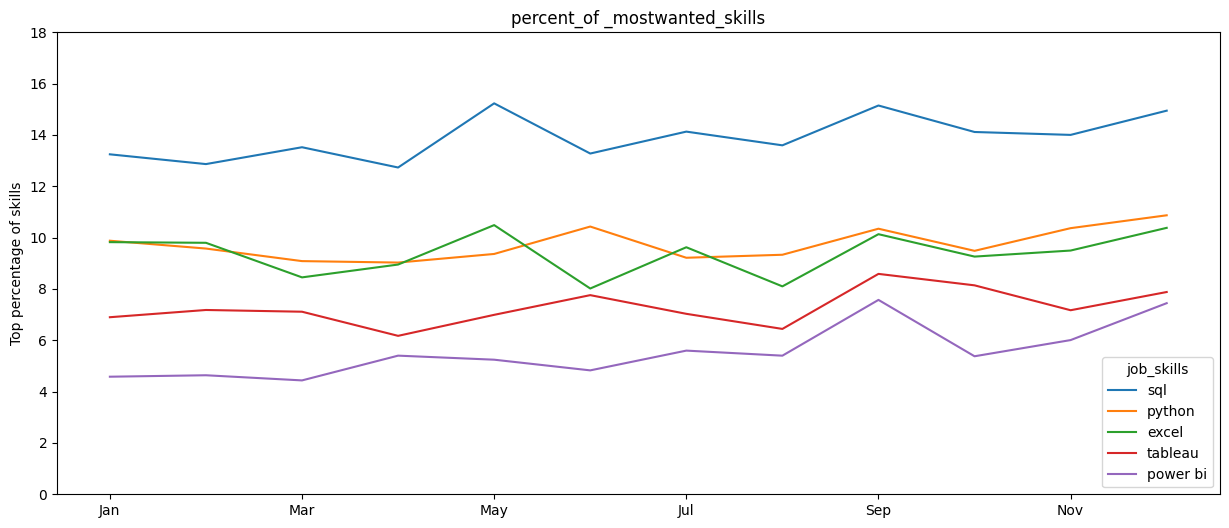

In [41]:
percent_skills.plot(kind='line', figsize=(15,6))
plt.title('percent_of _mostwanted_skills')
plt.ylim(0,18)
plt.xlabel('')
plt.ylabel('Top percentage of skills')
plt.savefig('Charts/most_wanted_skill_percent.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [7]:
df_ind = df[df['job_country']=='India'].copy()

In [8]:
# updating salary_year_avg using salary_hour_avg

condition = (df_ind['salary_year_avg'].isna()) & (df_ind['salary_hour_avg'].notna())
df_ind.loc[condition, 'salary_year_avg'] = df_ind.loc[condition, 'salary_hour_avg'] * 8 * 250
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51088 entries, 16 to 785740
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        51088 non-null  object        
 1   job_title              51088 non-null  object        
 2   job_location           51086 non-null  object        
 3   job_via                51088 non-null  object        
 4   job_schedule_type      50993 non-null  object        
 5   job_work_from_home     51088 non-null  bool          
 6   search_location        51088 non-null  object        
 7   job_posted_date        51088 non-null  datetime64[ns]
 8   job_no_degree_mention  51088 non-null  bool          
 9   job_health_insurance   51088 non-null  bool          
 10  job_country            51088 non-null  object        
 11  salary_rate            589 non-null    object        
 12  salary_year_avg        589 non-null    float64       
 13  sala

In [9]:
# dropped the salary_hour_avg column

df_ind.drop(labels='salary_hour_avg' ,axis = 1,inplace = True)
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51088 entries, 16 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        51088 non-null  object        
 1   job_title              51088 non-null  object        
 2   job_location           51086 non-null  object        
 3   job_via                51088 non-null  object        
 4   job_schedule_type      50993 non-null  object        
 5   job_work_from_home     51088 non-null  bool          
 6   search_location        51088 non-null  object        
 7   job_posted_date        51088 non-null  datetime64[ns]
 8   job_no_degree_mention  51088 non-null  bool          
 9   job_health_insurance   51088 non-null  bool          
 10  job_country            51088 non-null  object        
 11  salary_rate            589 non-null    object        
 12  salary_year_avg        589 non-null    float64       
 13  comp

In [10]:
# filling the na values using the median of the same job_title_short category 


df_ind['salary_year_avg'] = df_ind.groupby('job_title_short')['salary_year_avg'].transform(lambda x: x.fillna(x.median()))

c:\Users\mugun\Miniconda3\envs\dataenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
# dropping the na values if the salary_year_avg is na
df_ind.dropna(subset='salary_year_avg', axis=0, inplace=True)

In [10]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50737 entries, 16 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        50737 non-null  object        
 1   job_title              50737 non-null  object        
 2   job_location           50735 non-null  object        
 3   job_via                50737 non-null  object        
 4   job_schedule_type      50643 non-null  object        
 5   job_work_from_home     50737 non-null  bool          
 6   search_location        50737 non-null  object        
 7   job_posted_date        50737 non-null  datetime64[ns]
 8   job_no_degree_mention  50737 non-null  bool          
 9   job_health_insurance   50737 non-null  bool          
 10  job_country            50737 non-null  object        
 11  salary_rate            589 non-null    object        
 12  salary_year_avg        50737 non-null  float64       
 13  comp

In [12]:
# as drop duplicate will make a hash value for each rows and it cant accpet the list, only to reove duplicates we are converting the list into a str
df_ind['job_skills'] = df_ind['job_skills'].astype('str')

In [13]:
df_ind.drop_duplicates(inplace=True)

In [14]:
def safe_eval(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        # fallback: split by comma if list-like text
        if isinstance(x, str) and ',' in x:
            return [s.strip() for s in x.split(',')]
        return [x]  # return as single-item list if nothing else works

df_ind['job_skills'] = df_ind['job_skills'].apply(safe_eval)


In [15]:

type(df_ind['job_skills'][16])

list

In [16]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50729 entries, 16 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        50729 non-null  object        
 1   job_title              50729 non-null  object        
 2   job_location           50727 non-null  object        
 3   job_via                50729 non-null  object        
 4   job_schedule_type      50635 non-null  object        
 5   job_work_from_home     50729 non-null  bool          
 6   search_location        50729 non-null  object        
 7   job_posted_date        50729 non-null  datetime64[ns]
 8   job_no_degree_mention  50729 non-null  bool          
 9   job_health_insurance   50729 non-null  bool          
 10  job_country            50729 non-null  object        
 11  salary_rate            589 non-null    object        
 12  salary_year_avg        50729 non-null  float64       
 13  comp

In [17]:
df_ind.drop_duplicates(subset=['job_title_short', 'job_location', 'company_name', 'job_title'] , inplace = True)


In [18]:
top_jobs = df_ind['job_title_short'].value_counts().index[:6].tolist()
top_jobs

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Business Analyst']

In [19]:
df_ind_top_jobs  = df_ind[df_ind['job_title_short'].isin(top_jobs)]


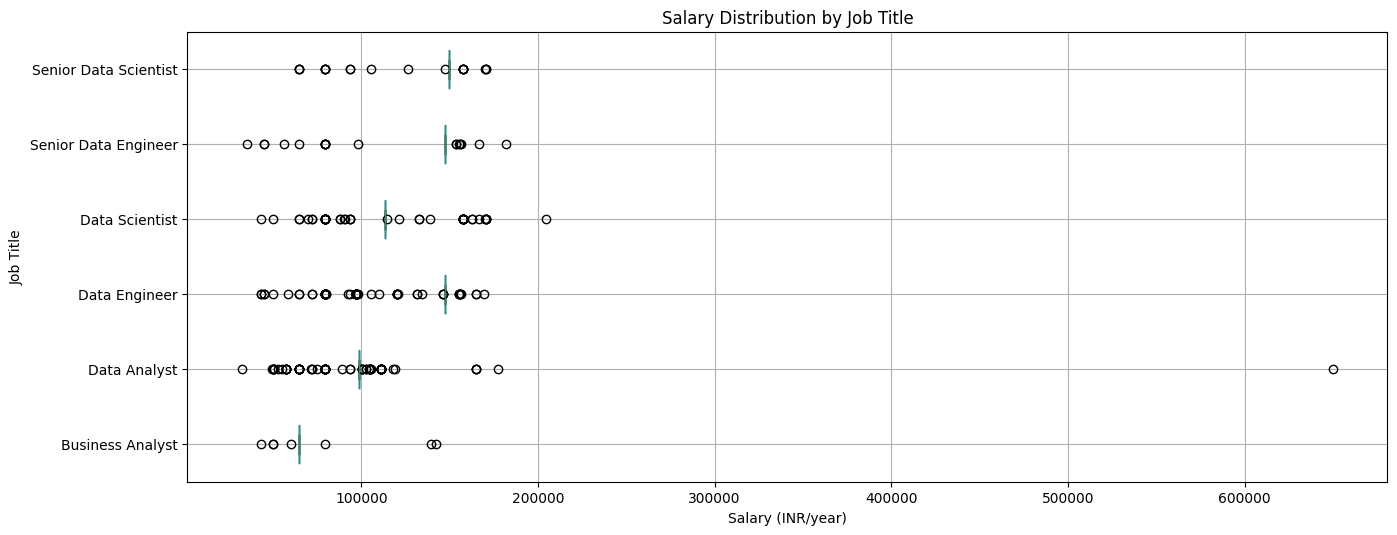

In [20]:
df_ind_top_jobs.boxplot( column='salary_year_avg',by='job_title_short', vert=False, figsize = (15,6))

plt.title("Salary Distribution by Job Title")
plt.suptitle("")  # removes automatic extra title
plt.xlabel("Salary (INR/year)")
plt.ylabel("Job Title")
plt.savefig('Charts/box_plot_salary_role.png' , dpi = 300, bbox_inches = 'tight')
plt.show()


In [21]:
df_ind_top_jobs.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
188749,Data Scientist,Data Scientist - Machine Learning/Python,"Mysuru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-11-07 15:11:03,False,False,India,NaN,113500.0,Test Triangle,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['...",11,Nov
690961,Data Engineer,GCP Data Engineer,"Mumbai, Maharashtra, India",via LinkedIn,Contractor,False,India,2023-06-12 10:30:27,False,False,India,NaN,147500.0,Harvy IT Services Pvt Ltd,"[sql, mongo, python, javascript, gcp, numpy, p...","{'analyst_tools': ['looker'], 'cloud': ['gcp']...",6,Jun
305324,Data Engineer,"Data Engineer, Python Developer, GCP/Senior So...","Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-09-07 17:11:40,False,False,India,NaN,147500.0,HSBC,"[python, gcp, airflow, hadoop, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['gcp'...",9,Sep
269819,Data Analyst,Lead Data Analyst,India,via BeBee India,Full-time,False,India,2023-01-09 07:11:56,True,False,India,NaN,98500.0,Tide,"[sql, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog...",1,Jan
175971,Data Engineer,Data Governance Engineer - Collibra,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-10-20 15:16:21,False,False,India,NaN,147500.0,V2SOFT INDIA,[nan],NaN,10,Oct


In [23]:
df_job_plot = df_ind_top_jobs[['job_title_short', 'salary_year_avg']]
df_job_plot

,job_title_short,salary_year_avg
16,Data Engineer,147500.0
19,Data Scientist,113500.0
29,Data Scientist,113500.0
38,Data Analyst,98500.0
42,Senior Data Engineer,147500.0
...,...,...
785684,Data Engineer,147500.0
785697,Data Scientist,113500.0
785712,Data Engineer,147500.0
785715,Data Analyst,98500.0


In [30]:
df_summary = (df_job_plot
              .groupby('job_title_short', as_index=False)
              .salary_year_avg.mean())

# Sort by salary
df_summary = df_summary.sort_values('salary_year_avg', ascending=True)


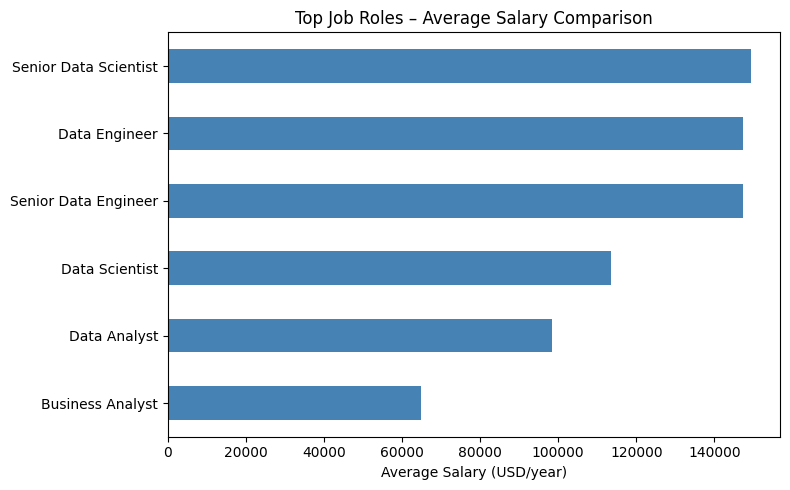

In [31]:
df_summary.plot(kind='barh',
                x='job_title_short',
                y='salary_year_avg',
                color='steelblue',
                legend=False,
                figsize=(8,5))

plt.xlabel('Average Salary (USD/year)')
plt.ylabel('')
plt.title('Top Job Roles – Average Salary Comparison')
plt.tight_layout()
plt.savefig('Charts/salary_for_top_roles.png', dpi=300, bbox_inches='tight')
plt.show()
